## WeatherPy

Analysis:

At this time in the year temperatures are below the 100 degrees around all the cities tested, so it is a good time for travel, although is clear that several cities are experiencing low tempertures mostly in the northen hemisphere.
Humidity presents regular values around the globe with some concentration off high values in the northern hemisphere.
This time in the year wind speed seems to be regular around  10 mph with some exceptions in the northern hemisphere around places located around 20 and 60 degrees N.


**Note**

- Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
# Import fro the regression
from scipy.stats import linregress
# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['cidreira', 'cap malheureux', 'rikitea', 'saskylakh', 'busselton', 'ushuaia', 'derzhavinsk', 'lata', 'avarua', 'nome', 'dhidhdhoo', 'la macarena', 'belushya guba', 'peleduy', 'bethel', 'olinda', 'halvad', 'abu dhabi', 'fort nelson', 'punta arenas', 'chokurdakh', 'kedougou', 'basco', 'mar del plata', 'fergus falls', 'saint george', 'ancud', 'saint-philippe', 'mehamn', 'albany', 'karratha', 'taolanaro', 'jamestown', 'humaita', 'atuona', 'rawson', 'haines junction', 'wanlaweyn', 'langsa', 'bluff', 'saldanha', 'marawi', 'bolshoy uluy', 'altagracia de orituco', 'dalbandin', 'samusu', 'provideniya', 'deputatskiy', 'mataura', 'puerto ayora', 'east london', 'nuuk', 'sentyabrskiy', 'cherskiy', 'biltine', 'bulawayo', 'stoyba', 'maceio', 'nuevitas', 'butaritari', 'cape town', 'leesburg', 'paris', 'kahului', 'faanui', 'illoqqortoormiut', 'norman wells', 'karasjok', 'port alfred', 'andenes', 'victoria', 'strezhevoy', 'huarmey', 'koslan', 'yar-sale', 'saleaula', 'kieta', 'qaanaaq', 'san cristobal',

### Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?q=Bogota&units=Imperial&APPID=" + weather_api_key
print(url)
# List of city data
citydata=requests.get(url).json()
print(citydata)

http://api.openweathermap.org/data/2.5/weather?q=Bogota&units=Imperial&APPID=1bfb265e9aa1667f9e2d6ef8a3debcf0
{'coord': {'lon': -74.08, 'lat': 4.61}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 45.16, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 1026, 'humidity': 100}, 'visibility': 200, 'wind': {'speed': 4.7, 'deg': 10}, 'clouds': {'all': 90}, 'dt': 1603972675, 'sys': {'type': 1, 'id': 8582, 'country': 'CO', 'sunrise': 1603968058, 'sunset': 1604011131}, 'timezone': -18000, 'id': 3688689, 'name': 'Bogotá', 'cod': 200}


In [4]:
# Create counters
long=[]
latt=[]
max_temp=[]
humidity=[]
clouds=[]
wind=[]
country=[]
error=0
group=0
index=0
altercity=[]
countcity=1                     # cities counter

In [5]:
print(f' Processing City  {city}   city no.  {countcity}')

 Processing City  bethel   city no.  1


In [6]:
# Loop through all the cities in our list

url1= "http://api.openweathermap.org/data/2.5/weather?"

counter=0                       # loop counter
counterr=0                      # error counter
                   
for city in cities:             # Running an API request for each of the cities and creating endpoint URL with each city
    try:
        print(f' Processing City  {city}   No.  {countcity}')
        citydata=requests.get(url1 + "q=" + city +"&units="+ 'imperial' + "&appid=" + weather_api_key).json()  # Parsing the JSON and retrieve data
        long.append(citydata['coord']['lon'])               # Parsing out the max temp, humidity, and cloudiness
        latt.append(citydata['coord']['lat'])
        max_temp.append(citydata['main']['temp_max'])
        humidity.append(citydata['main']['humidity'])
        clouds.append(citydata['clouds']['all'])
        wind.append(citydata['wind']['speed'])
        country.append(citydata['sys']['country'])
        altercity.append(city)        # Appending  the City information into city_data list
        counter = counter + 1         # Adding  1 to the record count
        countcity=countcity+1
    except KeyError as error:       # If an error is experienced, skip the city
                print(f' City {city} not found {counterr}  cities not founded') # How many records nof found?
                counterr=counterr+1
    if counter > 49:                  #Limit API calls to 50
        print(f' proccesing...........{counter}  more')
        counter=0
        time.sleep(10)                #Adding waiting time to reduce chance of overpass the API limit
    
print("-------------------Data loading completed------------------------") # Indicate that Data Loading is complete 


 Processing City  cidreira   No.  1
 Processing City  cap malheureux   No.  2
 Processing City  rikitea   No.  3
 Processing City  saskylakh   No.  4
 Processing City  busselton   No.  5
 Processing City  ushuaia   No.  6
 Processing City  derzhavinsk   No.  7
 Processing City  lata   No.  8
 Processing City  avarua   No.  9
 Processing City  nome   No.  10
 Processing City  dhidhdhoo   No.  11
 Processing City  la macarena   No.  12
 Processing City  belushya guba   No.  13
 City belushya guba not found 0  cities not founded
 Processing City  peleduy   No.  13
 Processing City  bethel   No.  14
 Processing City  olinda   No.  15
 Processing City  halvad   No.  16
 Processing City  abu dhabi   No.  17
 Processing City  fort nelson   No.  18
 Processing City  punta arenas   No.  19
 Processing City  chokurdakh   No.  20
 Processing City  kedougou   No.  21
 Processing City  basco   No.  22
 Processing City  mar del plata   No.  23
 Processing City  fergus falls   No.  24
 Processing Cit

 Processing City  iset   No.  181
 Processing City  hobyo   No.  182
 Processing City  lima   No.  183
 Processing City  durban   No.  184
 Processing City  lorengau   No.  185
 Processing City  tura   No.  186
 Processing City  astoria   No.  187
 Processing City  savinka   No.  188
 Processing City  eyl   No.  189
 Processing City  abomey   No.  190
 Processing City  luwuk   No.  191
 Processing City  asau   No.  192
 Processing City  banyo   No.  193
 Processing City  chernyshevskiy   No.  194
 Processing City  kattivakkam   No.  195
 Processing City  qidong   No.  196
 Processing City  pozo colorado   No.  197
 Processing City  challans   No.  198
 Processing City  camopi   No.  199
 Processing City  wajima   No.  200
 proccesing...........50  more
 Processing City  mamlyutka   No.  201
 Processing City  salalah   No.  202
 Processing City  ilhabela   No.  203
 Processing City  ust-tsilma   No.  204
 Processing City  touros   No.  205
 Processing City  katsuura   No.  206
 Processi

 Processing City  obera   No.  368
 Processing City  geraldton   No.  369
 Processing City  jacareacanga   No.  370
 Processing City  kouango   No.  371
 Processing City  pitsunda   No.  372
 Processing City  eirunepe   No.  373
 Processing City  egvekinot   No.  374
 Processing City  sulangan   No.  375
 Processing City  zhigansk   No.  376
 Processing City  ji-parana   No.  377
 City ji-parana not found 27  cities not founded
 Processing City  montecristi   No.  377
 Processing City  namatanai   No.  378
 Processing City  pangnirtung   No.  379
 Processing City  boguchany   No.  380
 Processing City  kiunga   No.  381
 Processing City  ust-maya   No.  382
 Processing City  terney   No.  383
 Processing City  manggar   No.  384
 Processing City  thompson   No.  385
 Processing City  lagoa   No.  386
 Processing City  lusambo   No.  387
 Processing City  jaisalmer   No.  388
 Processing City  ostrovnoy   No.  389
 Processing City  fare   No.  390
 Processing City  la ligua   No.  391
 

 Processing City  arman   No.  551
 Processing City  dubai   No.  552
 Processing City  abu samrah   No.  553
 Processing City  lisakovsk   No.  554
 Processing City  taksimo   No.  555
 Processing City  wyoming   No.  556
 Processing City  morgan city   No.  557
 Processing City  harper   No.  558
 Processing City  vilyuysk   No.  559
 Processing City  jega   No.  560
 Processing City  labuhan   No.  561
 Processing City  praya   No.  562
 Processing City  dolgoye   No.  563
 Processing City  kutum   No.  564
 Processing City  cayenne   No.  565
 Processing City  berlevag   No.  566
 Processing City  northam   No.  567
 Processing City  yeppoon   No.  568
 Processing City  inuvik   No.  569
 Processing City  kamloops   No.  570
 Processing City  konevo   No.  571
 Processing City  grand forks   No.  572
 Processing City  torbat-e jam   No.  573
 Processing City  ystad   No.  574
 Processing City  jining   No.  575
 Processing City  college   No.  576
 Processing City  vila velha   No.

## Convert Raw Data to DataFrame
- Export the city data into a .csv.
- Display the DataFrame

In [7]:
# Convert array of JSONs into Pandas DataFrame
citydata2={"City": altercity,
           "longitud": long, 
           "Latitud": latt, 
           "Maximum Temperture": max_temp, 
           "Humidity": humidity, 
           "Cloudines": clouds,
           "Wind Speed": wind, 
           "Country": country} 

In [8]:
# Show Record Count
len(citydata2["City"])

599

In [9]:
# Display the City Data Frame
cityweather_df=pd.DataFrame(citydata2)

In [10]:
cityweather_df.count()

City                  599
longitud              599
Latitud               599
Maximum Temperture    599
Humidity              599
Cloudines             599
Wind Speed            599
Country               599
dtype: int64

In [11]:
cityweather_df.head()

,City,longitud,Latitud,Maximum Temperture,Humidity,Cloudines,Wind Speed,Country
0,cidreira,-50.21,-30.18,63.63,85,97,15.30,BR
1,cap malheureux,57.61,-19.98,75.00,70,67,13.00,MU
2,rikitea,-134.97,-23.12,74.30,73,100,9.55,PF
3,saskylakh,114.08,71.92,-1.97,87,35,2.28,RU
4,busselton,115.33,-33.65,68.00,26,0,10.51,AU


## Inspect the data and remove the cities where the humidity > 100%.

- Skip this step if there are no cities that have humidity > 100%.

In [12]:
cityweather_df.describe() # Max humidity is 100 so I'll skip this step.

,longitud,Latitud,Maximum Temperture,Humidity,Cloudines,Wind Speed
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,18.410083,21.654725,59.175125,72.145242,54.494157,8.059115
std,90.185870,33.172762,23.888064,22.469614,38.182052,5.747892
min,-179.170000,-54.800000,-11.650000,8.000000,0.000000,0.040000
25%,-59.330000,-5.190000,44.770000,62.000000,16.000000,3.620000
50%,22.680000,27.080000,63.000000,78.000000,67.000000,6.710000
75%,100.340000,49.725000,79.145000,88.000000,90.000000,11.020000
max,179.320000,78.220000,100.090000,100.000000,100.000000,34.450000


In [13]:
#  Get the indices of cities that have humidity over 100%.
#  There is no cities with humidity over 100%

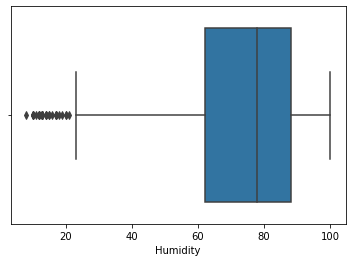

In [14]:
sns.boxplot(x=cityweather_df['Humidity'])                 # using sns to find the outliers

In [15]:

Q1 = cityweather_df['Humidity'].quantile(0.25)
Q3 = cityweather_df['Humidity'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


26.0


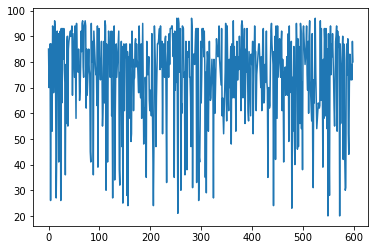

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

y = cityweather_df['Humidity']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
y[removed_outliers].plot(x='Cities', y='Humidity')

In [17]:
print(removed_outliers.value_counts())

True     540
False     59
Name: Humidity, dtype: int64


In [18]:
cityweather_df

,City,longitud,Latitud,Maximum Temperture,Humidity,Cloudines,Wind Speed,Country
0,cidreira,-50.21,-30.18,63.63,85,97,15.30,BR
1,cap malheureux,57.61,-19.98,75.00,70,67,13.00,MU
2,rikitea,-134.97,-23.12,74.30,73,100,9.55,PF
3,saskylakh,114.08,71.92,-1.97,87,35,2.28,RU
4,busselton,115.33,-33.65,68.00,26,0,10.51,AU
...,...,...,...,...,...,...,...,...
594,camiri,-63.52,-20.05,69.80,73,90,5.82,BO
595,baker city,-117.83,44.77,41.00,79,1,2.26,US
596,uong bi,106.78,21.03,75.20,73,90,11.41,VN
597,san antonio del norte,-87.70,13.88,69.80,88,40,5.91,HN


In [19]:
index_names = cityweather_df[~removed_outliers].index       # Inverting to get the index names to drop
print(index_names)                                          # The resulting to drop.

Int64Index([ 41,  45,  49,  50,  71,  77,  78,  86,  90,  91, 120, 135, 136,
            151, 161, 186, 213, 217, 234, 244, 264, 274, 285, 288, 315, 322,
            328, 329, 332, 337, 338, 345, 346, 357, 387, 391, 395, 396, 410,
            411, 412, 415, 416, 440, 448, 452, 453, 502, 505, 515, 516, 523,
            528, 529, 531, 559, 563, 577, 593],
           dtype='int64')


In [20]:
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "cityweather_df_out".
# Extract relevant fields from the data frame

cityweather_df_out = cityweather_df.drop(index_names, inplace=False)

cityweather_df_out

,City,longitud,Latitud,Maximum Temperture,Humidity,Cloudines,Wind Speed,Country
0,cidreira,-50.21,-30.18,63.63,85,97,15.30,BR
1,cap malheureux,57.61,-19.98,75.00,70,67,13.00,MU
2,rikitea,-134.97,-23.12,74.30,73,100,9.55,PF
3,saskylakh,114.08,71.92,-1.97,87,35,2.28,RU
4,busselton,115.33,-33.65,68.00,26,0,10.51,AU
...,...,...,...,...,...,...,...,...
594,camiri,-63.52,-20.05,69.80,73,90,5.82,BO
595,baker city,-117.83,44.77,41.00,79,1,2.26,US
596,uong bi,106.78,21.03,75.20,73,90,11.41,VN
597,san antonio del norte,-87.70,13.88,69.80,88,40,5.91,HN


In [21]:
# Export the City_Data into a csv
cityweather_df_out.to_csv("cityweather.csv", encoding = 'utf-8', index=False)

## Latitude vs. Temperature Plot

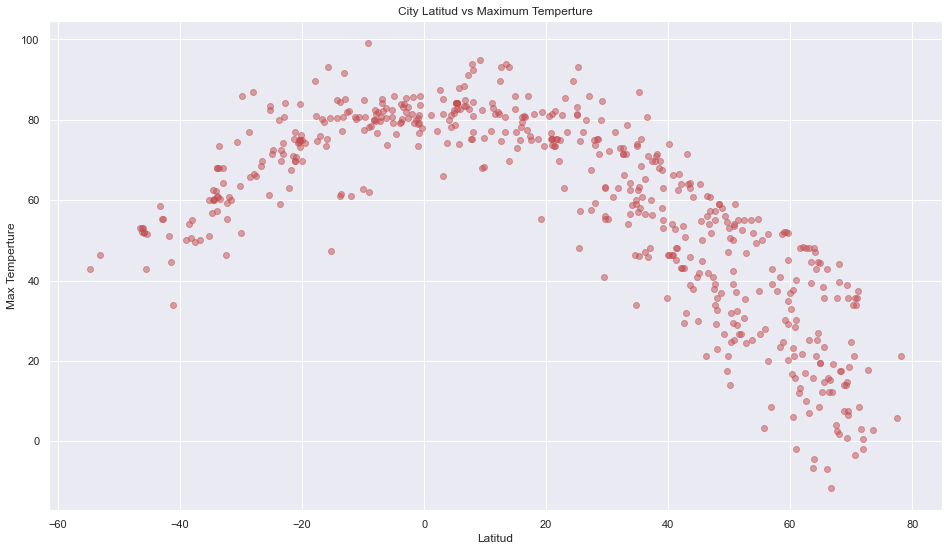

In [22]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(16,9))
sns.set()                                      # Incorporating the other graph properties
plt.scatter(cityweather_df_out["Latitud"], cityweather_df_out["Maximum Temperture"], color='r', alpha=0.5)
plt.xlabel('Latitud')
plt.ylabel('Max Temperture')
plt.title(f'City Latitud vs Maximum Temperture')
plt.savefig("LatvsTemp.png")                   # Saving the figure
plt.show()                                     # Showing plot


## Latitude vs. Humidity Plot

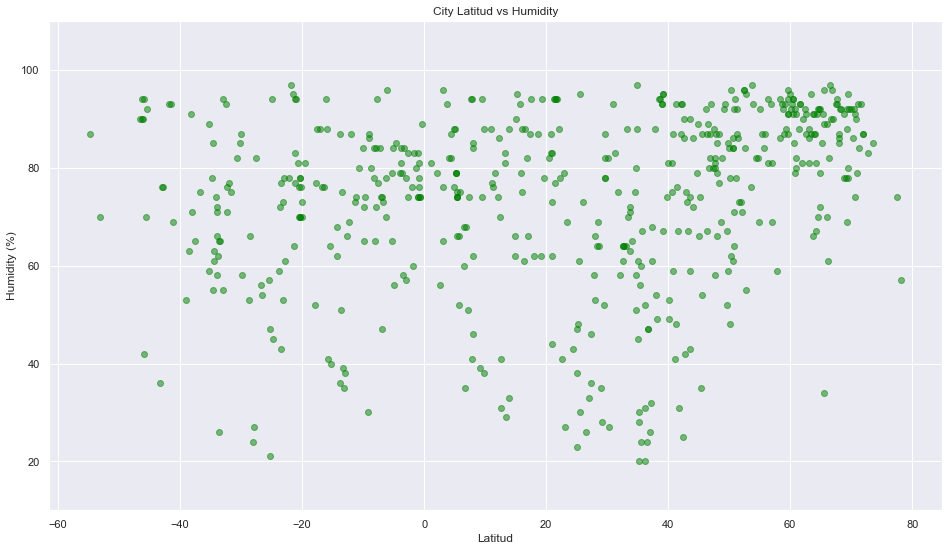

In [23]:
# Build the scatter plots for latitude vs. humidity

plt.figure(figsize=(16,9))                        # Incorporating the other graph properties
sns.set()
plt.scatter(cityweather_df_out["Latitud"], cityweather_df_out["Humidity"], color='green', alpha=0.5)
plt.ylim(10,110)
plt.xlabel('Latitud')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitud vs Humidity')
plt.savefig("LatvsHumid.png")                     # Saving the figure
plt.show()                                        # Showing plot


## Latitude vs. Cloudiness Plot

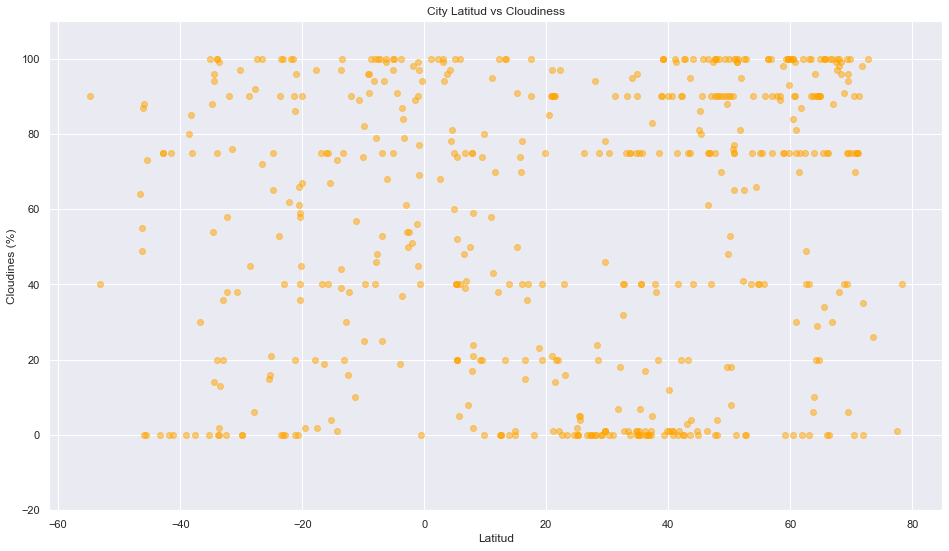

In [24]:
# Build the scatter plots for latitude vs. cloudiness

plt.figure(figsize=(16,9))                         # Incorporating the other graph properties
sns.set()
plt.scatter(cityweather_df_out["Latitud"], cityweather_df_out["Cloudines"], color='orange', alpha=0.5)
plt.ylim(-20,(cityweather_df_out["Cloudines"].max()+10))
plt.xlabel('Latitud')
plt.ylabel('Cloudines (%)')
plt.title(f'City Latitud vs Cloudiness')
plt.savefig("LatvsCloud.png")                      # Saving the figure
plt.show()                                         # Showing plot


## Latitude vs. Wind Speed Plot

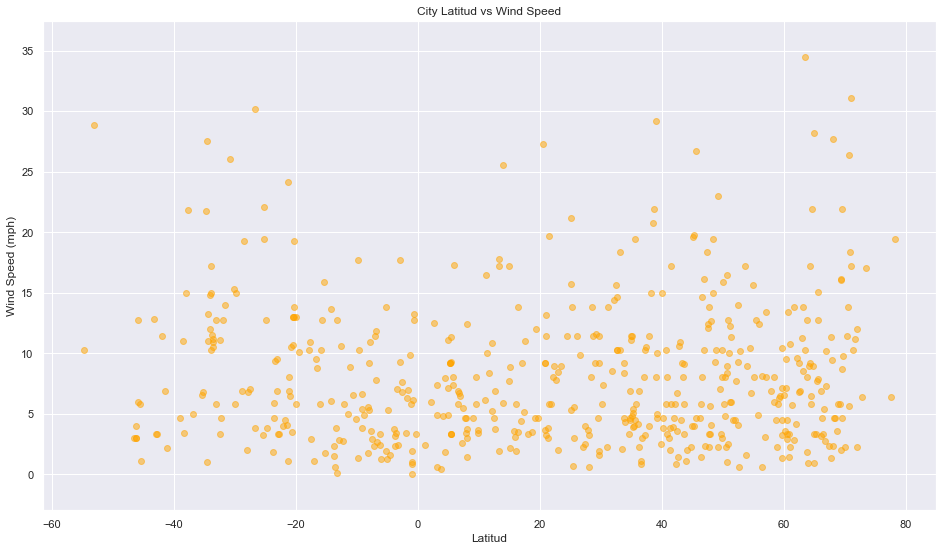

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(16,9))                         # Incorporating the other graph properties
sns.set()
plt.scatter(cityweather_df_out["Latitud"], cityweather_df_out["Wind Speed"], color='orange', alpha=0.5)
plt.ylim((cityweather_df_out["Wind Speed"].min()-3),(cityweather_df_out["Wind Speed"].max()+3))
plt.xlabel('Latitud')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitud vs Wind Speed')
plt.savefig("LatvsWind.png")                      # Saving the figure
plt.show()                                        # Showing plot








## Linear Regression

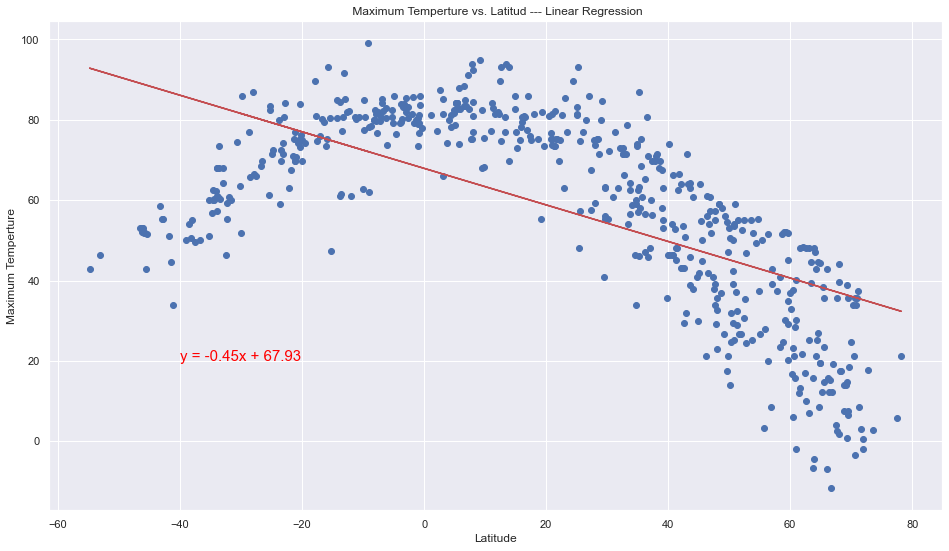

In [26]:
# Create a function to create Linear Regression plots
#y-mx+b
x = pd.to_numeric(cityweather_df_out['Latitud']).astype(float)
y = pd.to_numeric(cityweather_df_out['Maximum Temperture']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = slope * x + intercept                                        # y-mx+b
lineq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.plot(x,regression,"r-")
plt.annotate(lineq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperture')
plt.title(' Maximum Temperture vs. Latitud --- Linear Regression')
plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames
northem_df=cityweather_df_out.loc[pd.to_numeric(cityweather_df_out['Latitud']).astype(float)>0,:]
northem_df

,City,longitud,Latitud,Maximum Temperture,Humidity,Cloudines,Wind Speed,Country
3,saskylakh,114.08,71.92,-1.97,87,35,2.28,RU
6,derzhavinsk,66.32,51.10,37.26,78,0,12.28,KZ
7,lata,-8.33,40.16,73.99,53,12,3.87,PT
9,nome,-165.41,64.50,27.00,92,90,5.82,US
10,dhidhdhoo,73.10,6.88,83.50,68,41,6.44,MV
...,...,...,...,...,...,...,...,...
591,oussouye,-16.55,12.48,89.60,70,0,4.70,SN
592,kihei,-156.47,20.79,75.20,83,90,9.17,US
595,baker city,-117.83,44.77,41.00,79,1,2.26,US
596,uong bi,106.78,21.03,75.20,73,90,11.41,VN


In [28]:
southem_df=cityweather_df_out.loc[pd.to_numeric(cityweather_df_out['Latitud']).astype(float)<0,:]
southem_df

,City,longitud,Latitud,Maximum Temperture,Humidity,Cloudines,Wind Speed,Country
0,cidreira,-50.21,-30.18,63.63,85,97,15.30,BR
1,cap malheureux,57.61,-19.98,75.00,70,67,13.00,MU
2,rikitea,-134.97,-23.12,74.30,73,100,9.55,PF
4,busselton,115.33,-33.65,68.00,26,0,10.51,AU
5,ushuaia,-68.30,-54.80,42.80,87,90,10.29,AR
...,...,...,...,...,...,...,...,...
567,yeppoon,150.73,-23.13,71.60,53,0,6.93,AU
576,vila velha,-40.29,-20.33,84.00,78,40,13.87,BR
583,bukama,25.85,-9.20,99.05,30,96,3.83,CD
594,camiri,-63.52,-20.05,69.80,73,90,5.82,BO


### Max Temp vs. Latitude Linear Regression

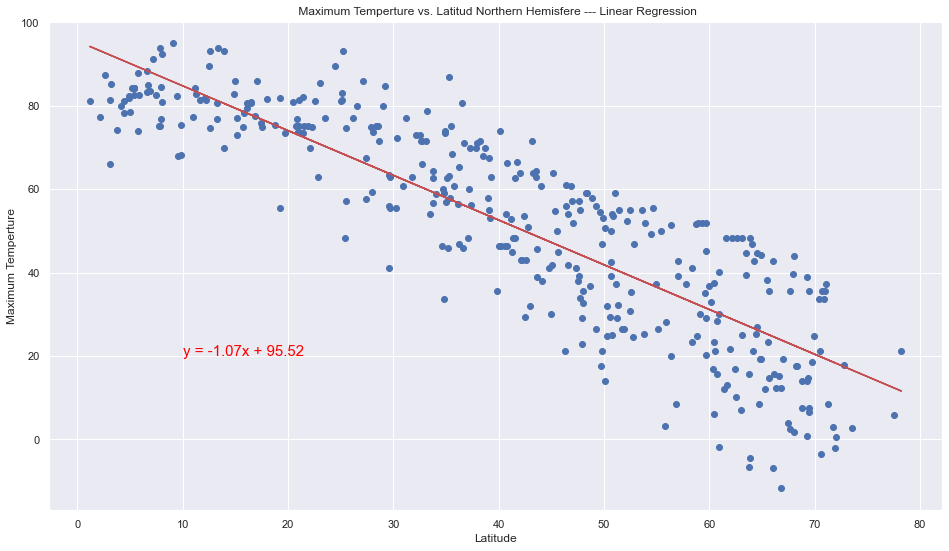

In [29]:
# Linear regression on Northern Hemisphere
x = pd.to_numeric(northem_df['Latitud']).astype(float)
y = pd.to_numeric(northem_df['Maximum Temperture']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = slope * x + intercept                                        # y-mx+b
lineq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.plot(x,regression,"r-")
plt.annotate(lineq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperture')
plt.title(' Maximum Temperture vs. Latitud Northern Hemisfere --- Linear Regression')
plt.show()

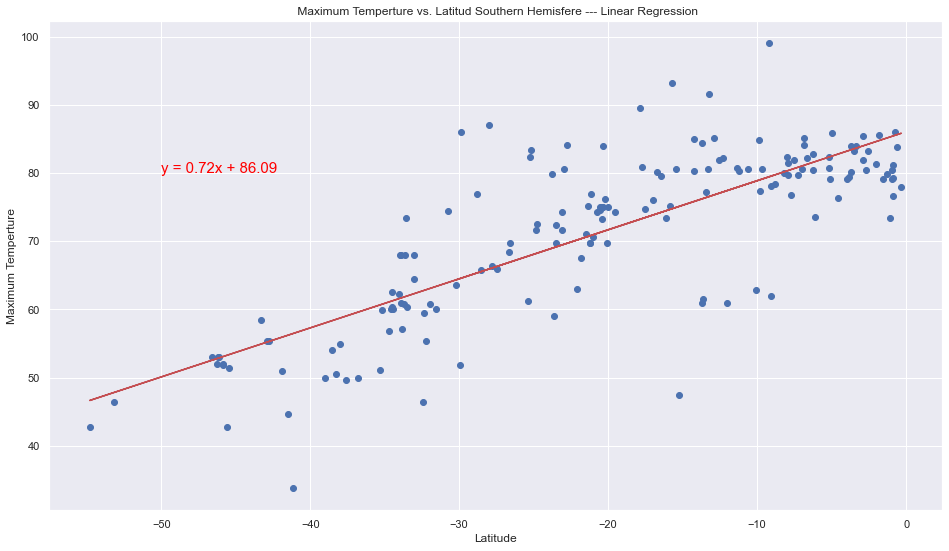

In [30]:
# Linear regression on Southern Hemisphere
x = pd.to_numeric(southem_df['Latitud']).astype(float)
y = pd.to_numeric(southem_df['Maximum Temperture']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = slope * x + intercept                                        # y-mx+b
lineq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.plot(x,regression,"r-")
plt.annotate(lineq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperture')
plt.title(' Maximum Temperture vs. Latitud Southern Hemisfere --- Linear Regression')
plt.show()

### Humidity (%) vs. Latitude Linear Regression

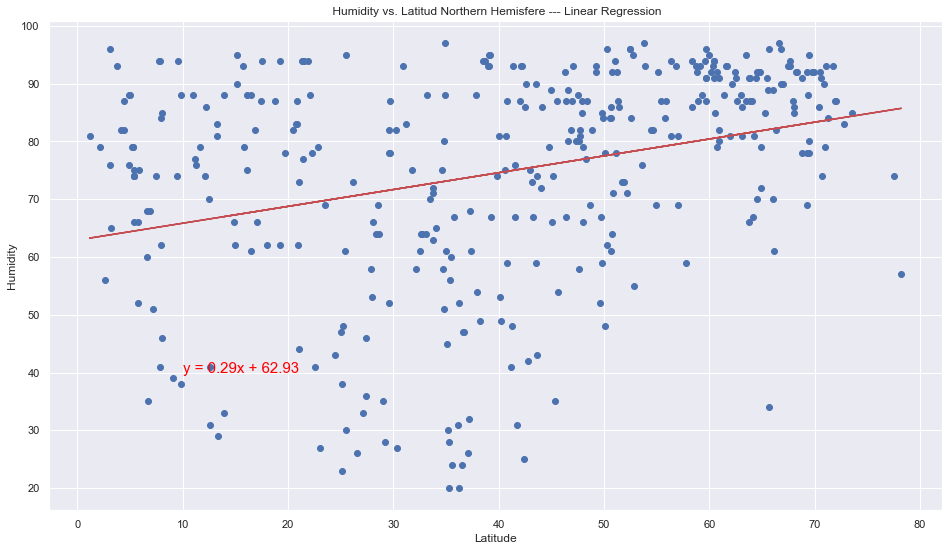

In [31]:
# Northern Hemisphere
x = pd.to_numeric(northem_df['Latitud']).astype(float)
y = pd.to_numeric(northem_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = slope * x + intercept                                        # y-mx+b
lineq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.plot(x,regression,"r-")
plt.annotate(lineq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(' Humidity vs. Latitud Northern Hemisfere --- Linear Regression')
plt.show()

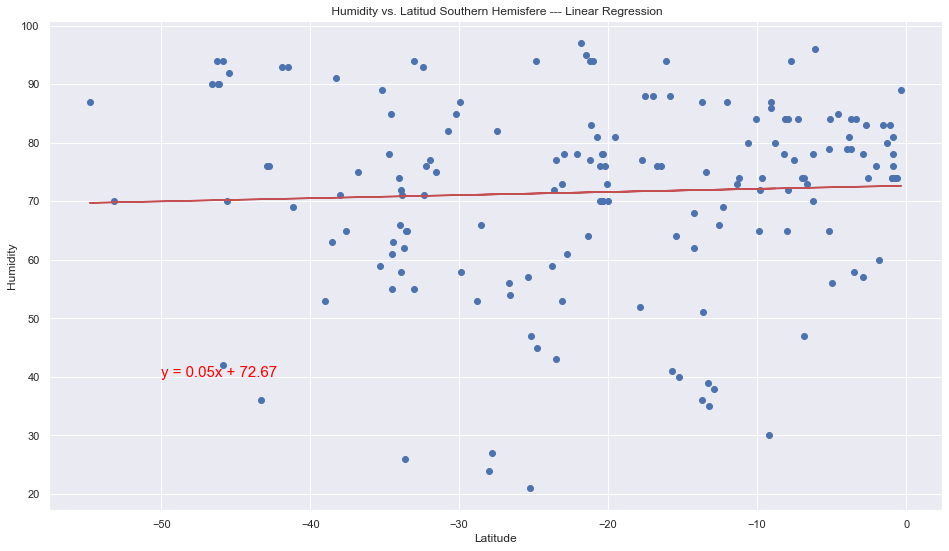

In [32]:
# Southern Hemisphere
x = pd.to_numeric(southem_df['Latitud']).astype(float)
y = pd.to_numeric(southem_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = slope * x + intercept                                        # y-mx+b
lineq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.plot(x,regression,"r-")
plt.annotate(lineq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(' Humidity vs. Latitud Southern Hemisfere --- Linear Regression')
plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

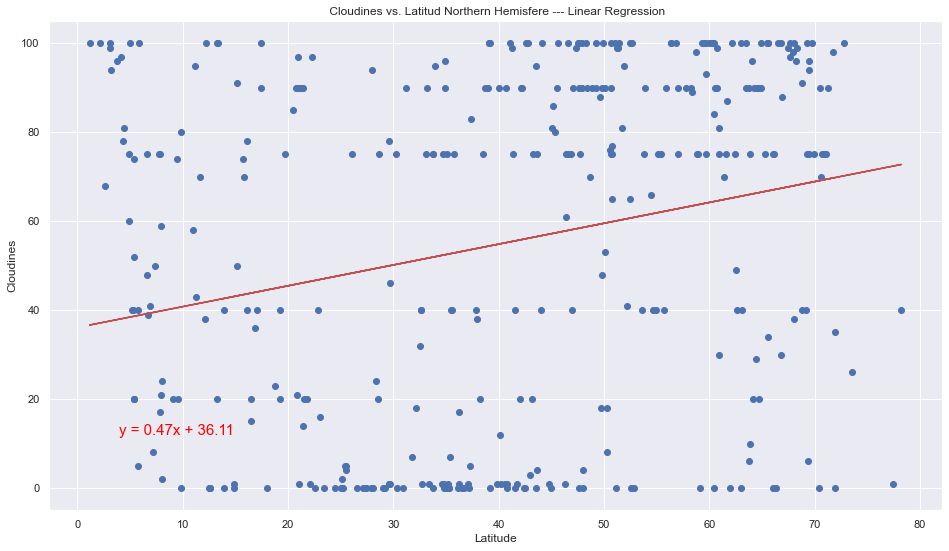

In [33]:
# Northern Hemisphere
x = pd.to_numeric(northem_df['Latitud']).astype(float)
y = pd.to_numeric(northem_df['Cloudines']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = slope * x + intercept                                        # y-mx+b
lineq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.plot(x,regression,"r-")
plt.annotate(lineq,(4,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudines')
plt.title(' Cloudines vs. Latitud Northern Hemisfere --- Linear Regression')
plt.show()

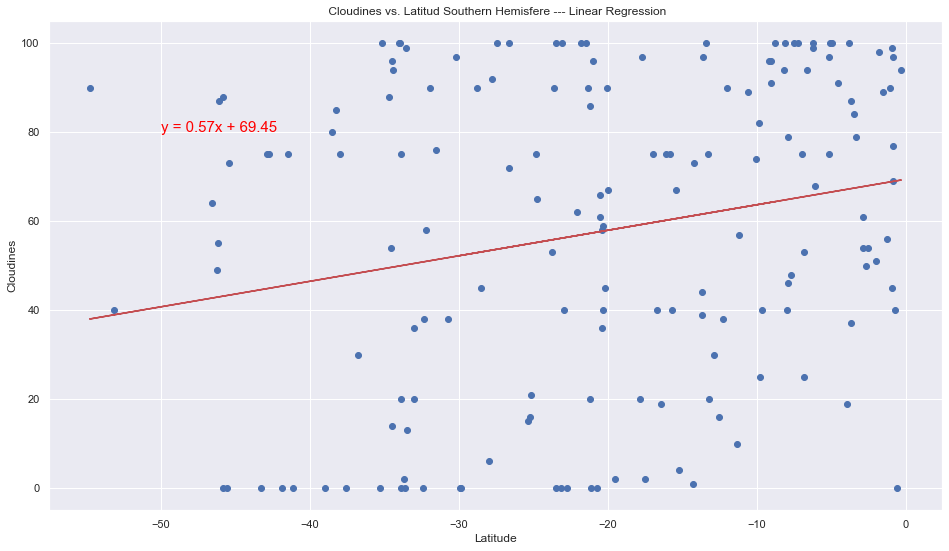

In [34]:
# Southern Hemisphere
x = pd.to_numeric(southem_df['Latitud']).astype(float)
y = pd.to_numeric(southem_df['Cloudines']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = slope * x + intercept                                        # y-mx+b
lineq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.plot(x,regression,"r-")
plt.annotate(lineq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudines')
plt.title(' Cloudines vs. Latitud Southern Hemisfere --- Linear Regression')
plt.show()

### Wind Speed (mph) vs. Latitude Linear Regression

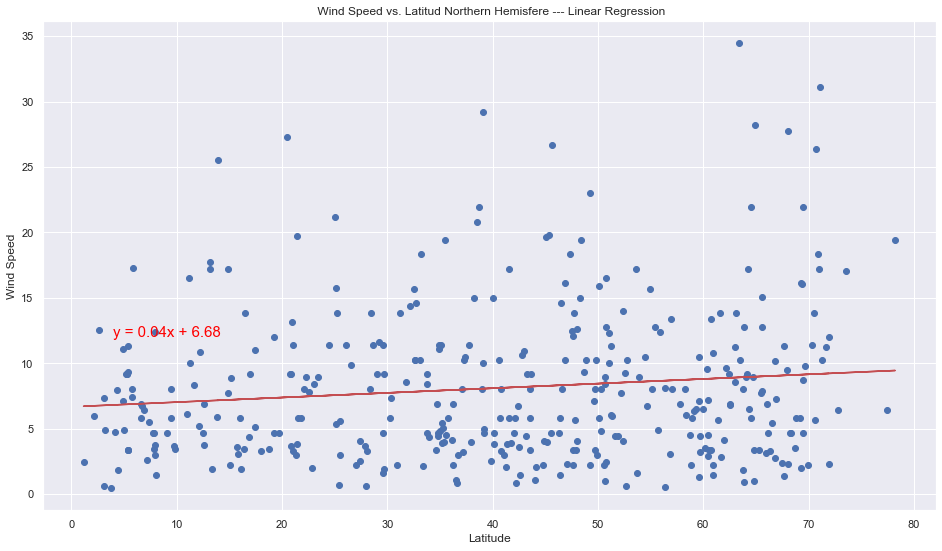

In [35]:
# Northern Hemisphere
x = pd.to_numeric(northem_df['Latitud']).astype(float)
y = pd.to_numeric(northem_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = slope * x + intercept                                        # y-mx+b
lineq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.plot(x,regression,"r-")
plt.annotate(lineq,(4,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(' Wind Speed vs. Latitud Northern Hemisfere --- Linear Regression')
plt.show()

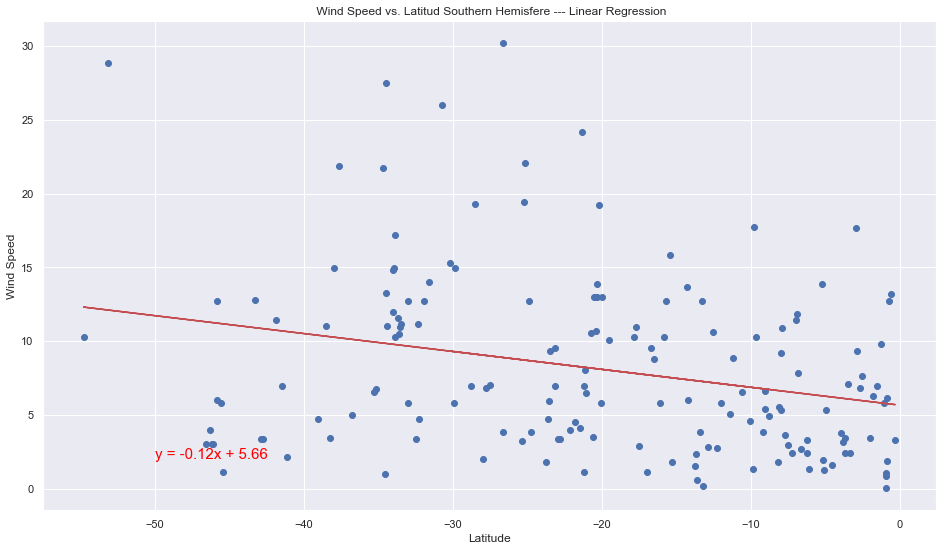

In [36]:
# Southern Hemisphere
x = pd.to_numeric(southem_df['Latitud']).astype(float)
y = pd.to_numeric(southem_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = slope * x + intercept                                        # y-mx+b
lineq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig = plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.plot(x,regression,"r-")
plt.annotate(lineq,(-50,2),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(' Wind Speed vs. Latitud Southern Hemisfere --- Linear Regression')
plt.show()